In [7]:
import pandas as pd

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import bartlett

import IPython

%matplotlib inline

In [8]:
def print_pgfplot(data):
    print("\\begin{axis}[stack plots=y, stack dir=minus,")
    print("xmajorgrids=true,")
    print("every major grid/.style={black, opacity=0.1},")
    print("ytick={{{0}}},".format(", ".join([str(-i) for i in range(1, data.shape[1]+1)])))
    print("yticklabels={{{0}}}".format(", ".join([col.replace("_", " ") for col in data])))
    print("]")
    
    for col in data:
        print("\\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {")
        print("({0},1) +- ({1},{1})".format(data[col]["mean"], data[col]["halfwidth"]))
        print("};")
    print("\\end{axis}")

In [9]:
def collect_results(iter_num, networks, metric="CLA"):
    N_SIM = 10


    matrix = []
    for network in networks:
        row = []
        for i in range(N_SIM):
            data_sim = pd.read_csv("results_of_simulation/shift_sim_data/"\
                                   "data_{0}_to_clique_{1}{2}".format(network, metric, i),
                                   delim_whitespace=True, header=None, index_col=0)
            row.append(data_sim.loc[iter_num].mean())
        matrix.append(row)

    results = pd.DataFrame(matrix)
    results.columns = list(range(N_SIM))
    results.index = networks

    return results

In [10]:
def bartlett_anova_tukey_suite(r):
    plt.figure(figsize=(18,10))
    sns.violinplot(data=r)
    print(bartlett(*[r[col] for col in r]))
    
    r1 = pd.melt(r)

    lm = ols("value~variable", r1).fit()
    alm = anova_lm(lm)
    IPython.display.display(alm)
    
    comp_res = pairwise_tukeyhsd(r1["value"], r1["variable"])
    comp_res.plot_simultaneous()
    IPython.display.display(comp_res.summary())
    
    means = r.mean()
    halfwidths = pd.Series(comp_res.halfwidths)
    halfwidths.index = means.index
    
    res = pd.DataFrame([means, halfwidths])
    res.index = ["mean", "halfwidth"]
    
    return res

## Mason topologies 10000

BartlettResult(statistic=8.5245438186409768, pvalue=0.2886163327970917)


,df,sum_sq,mean_sq,F,PR(>F)
variable,7,0.378208,0.054030,63.950366,2.299549e-28
Residual,72,0.060831,0.000845,NaN,NaN


group1,group2,meandiff,lower,upper,reject
max_avg_bet,max_avg_clust,0.0347,-0.0058,0.0753,False
max_avg_bet,max_max_bet,0.028,-0.0126,0.0686,False
max_avg_bet,max_max_clos,0.1432,0.1027,0.1838,True
max_avg_bet,max_var_cons,0.1044,0.0638,0.145,True
max_avg_bet,min_avg_bet,0.1844,0.1438,0.225,True
max_avg_bet,min_avg_clust,0.1766,0.136,0.2172,True
max_avg_bet,min_max_clos,0.0316,-0.009,0.0722,False
max_avg_clust,max_max_bet,-0.0067,-0.0473,0.0338,False
max_avg_clust,max_max_clos,0.1085,0.0679,0.1491,True
max_avg_clust,max_var_cons,0.0696,0.029,0.1102,True


\begin{axis}[stack plots=y, stack dir=minus,
xmajorgrids=true,
every major grid/.style={black, opacity=0.1},
ytick={-1, -2, -3, -4, -5, -6, -7, -8},
yticklabels={max avg bet, max avg clust, max max bet, max max clos, max var cons, min avg bet, min avg clust, min max clos}
]
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.29000000000000004,1) +- (0.02028900952070114,0.02028900952070114)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.32475,1) +- (0.02028900952070114,0.02028900952070114)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.318,1) +- (0.02028900952070114,0.02028900952070114)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.43325,1) +- (0.02028900952070114,0.0

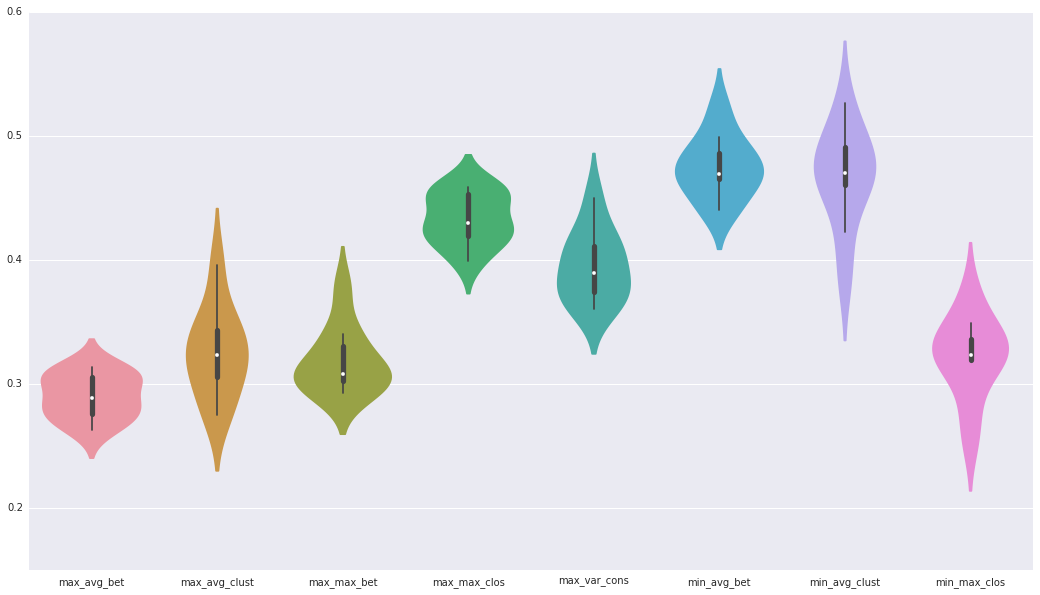

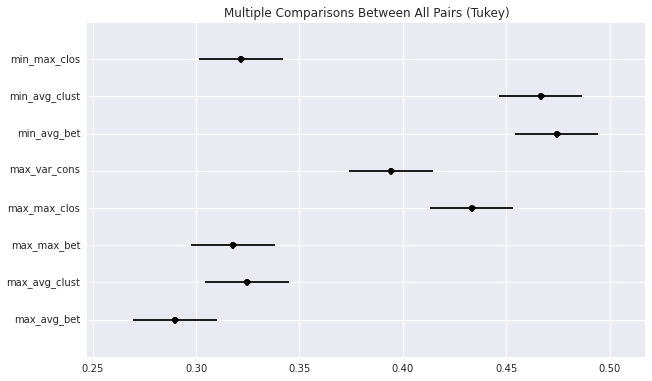

In [11]:
networks = ["max_avg_bet", "max_avg_clust", "max_max_bet", "max_max_clos",
            "max_var_cons", "min_avg_bet", "min_avg_clust", "min_max_clos",
            # "clique"
            # "hub", "clique", "hub_hearer", "hub_speaker"
           ]

r = collect_results(10000, networks).T
res = bartlett_anova_tukey_suite(r)
print_pgfplot(res)

## Hub 10000

BartlettResult(statistic=4.4672304550814284, pvalue=0.21523194696624726)


,df,sum_sq,mean_sq,F,PR(>F)
variable,3,1.210115,0.403372,228.974943,1.691411e-23
Residual,36,0.063419,0.001762,NaN,NaN


group1,group2,meandiff,lower,upper,reject
clique,hub,-0.1934,-0.2439,-0.1428,True
clique,hub_hearer,-0.0345,-0.0851,0.0161,False
clique,hub_speaker,-0.4406,-0.4912,-0.3901,True
hub,hub_hearer,0.1589,0.1083,0.2094,True
hub,hub_speaker,-0.2472,-0.2978,-0.1967,True
hub_hearer,hub_speaker,-0.4061,-0.4567,-0.3556,True


\begin{axis}[stack plots=y, stack dir=minus,
xmajorgrids=true,
every major grid/.style={black, opacity=0.1},
ytick={-1, -2, -3, -4},
yticklabels={hub, clique, hub hearer, hub speaker}
]
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.498625,1) +- (0.02527673794089221,0.02527673794089221)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.6919999999999998,1) +- (0.02527673794089221,0.02527673794089221)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.6575000000000001,1) +- (0.02527673794089221,0.02527673794089221)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.251375,1) +- (0.02527673794089221,0.02527673794089221)
};
\end{axis}


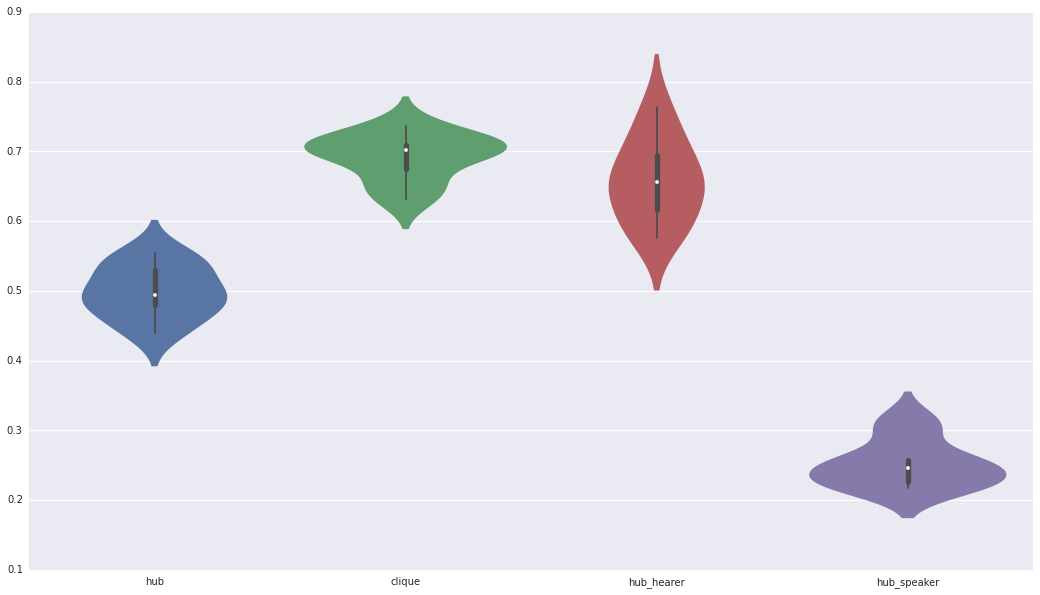

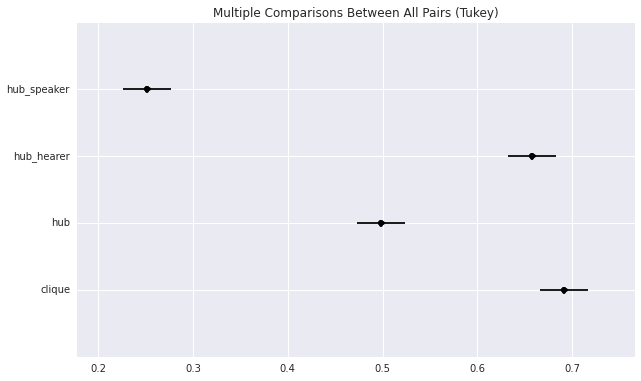

In [12]:
networks = ["hub", "clique",
            "hub_hearer",
            "hub_speaker"
           ]

r = collect_results(10000, networks).T
res = bartlett_anova_tukey_suite(r)
print_pgfplot(res)

## Hub 20000

BartlettResult(statistic=1.1965470052710807, pvalue=0.75383260105067684)


,df,sum_sq,mean_sq,F,PR(>F)
variable,3,0.053156,0.017719,14.909957,0.000002
Residual,36,0.042781,0.001188,NaN,NaN


group1,group2,meandiff,lower,upper,reject
clique,hub,-0.0366,-0.0781,0.0049,False
clique,hub_hearer,0.055,0.0135,0.0965,True
clique,hub_speaker,-0.0315,-0.073,0.01,False
hub,hub_hearer,0.0916,0.0501,0.1331,True
hub,hub_speaker,0.0051,-0.0364,0.0466,False
hub_hearer,hub_speaker,-0.0865,-0.128,-0.045,True


\begin{axis}[stack plots=y, stack dir=minus,
xmajorgrids=true,
every major grid/.style={black, opacity=0.1},
ytick={-1, -2, -3, -4},
yticklabels={hub, clique, hub hearer, hub speaker}
]
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.7048750000000001,1) +- (0.020760539966302623,0.020760539966302623)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.7414999999999999,1) +- (0.020760539966302623,0.020760539966302623)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.7965000000000001,1) +- (0.020760539966302623,0.020760539966302623)
};
\addplot+[color=black, mark=*, solid, thick, mark options={fill=black}, error bars/.cd,x dir=both,x explicit] coordinates {
(0.7100000000000001,1) +- (0.020760539966302623,0.020760539966302623)
};
\end{axis}


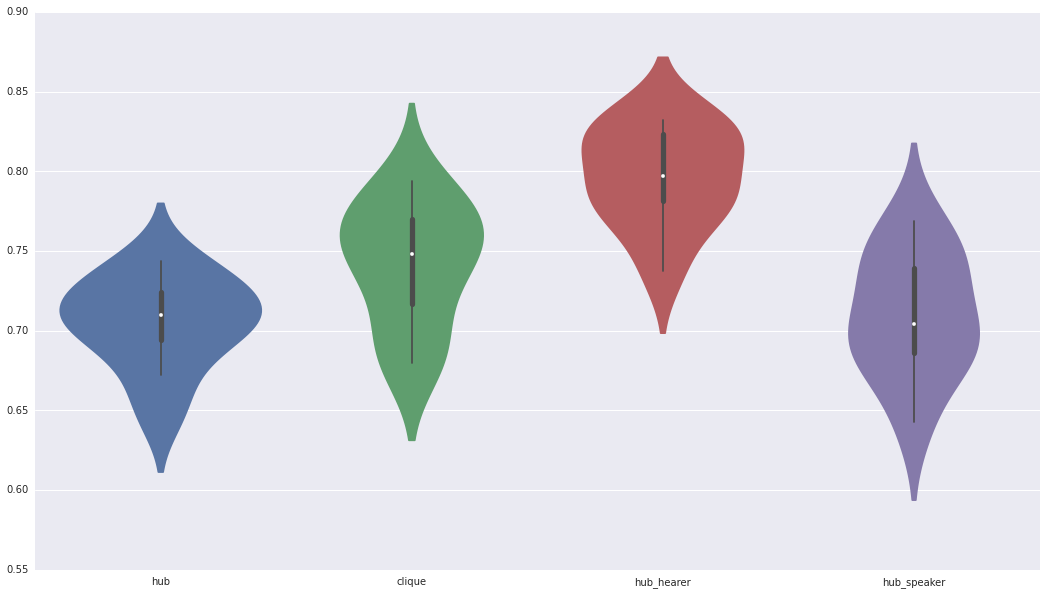

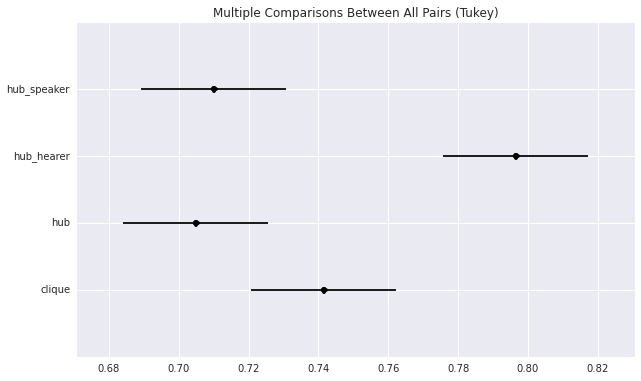

In [13]:
networks = ["hub", "clique",
            "hub_hearer",
            "hub_speaker"
           ]

r = collect_results(20000, networks).T
res = bartlett_anova_tukey_suite(r)
print_pgfplot(res)